<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li></ul></div>

# Рекомендация тарифов

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы . Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy.Нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

## Изучение данных

Подключаем необходимые библиотеки

In [30]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

Открываем файл

In [31]:
df = pd.read_csv('/datasets/users_behavior.csv')

Посмотрим на данные и решим какие столбцы являются фичами,а какие целевой переменной

In [32]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Очевидно, что фичами являются все столбцы, кроме "is_ultra", он как раз является целевой переменной.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


## Подготовка данных

Создадим переменную с фичами, в которую добавим всё кроме столбца "is_ultra". Так же создадим переменную target в которую положим только целевую переменную.

In [34]:
features = df.drop(['is_ultra'],axis = 1 )
target = df['is_ultra']

Далее разделим датасет сначала на тренировочный ( X и y с окончаниями train), который будет составляь 60 процетов от всего набора данных. Остальные 40 процентов датасета записываем в переменные X_test и y_test. Далее эти 40 процентов поделим пополам на валидационный  и итоговый тестовый набор данных,который необходимо будет предсказать.

In [35]:
X_train,X_test,y_train,y_test = train_test_split(features,target, test_size=0.4, random_state=42)
X_test,X_valid,y_test,y_valid = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

Далее проверяем правильно ли мы разделили датасет на необходимые нам подвыборки

In [36]:
print('Размер всей выборки: ',features.shape)
print('Размер тренировочной выборки: ' , X_train.shape)
print('Размер тестовой выборки: ',X_test.shape)
print('Размер валидационной выборки: ', X_valid.shape)

Размер всей выборки:  (3214, 4)
Размер тренировочной выборки:  (1928, 4)
Размер тестовой выборки:  (643, 4)
Размер валидационной выборки:  (643, 4)


Всё верно. Идём дальше.

## Исследование моделей

### Decision Tree

Первая модель которую мы будем проверять будет дерево решений. Создаём пустые переменные в которые будем записывать лучшую модель, глубину дерева и получившийся результат.

Лучшая точность полученная на дереве решений:  0.8118195956454122
Лучшая глубина дерева:  4


<AxesSubplot:title={'center':'График зависимости точности от глубины дерева'}>

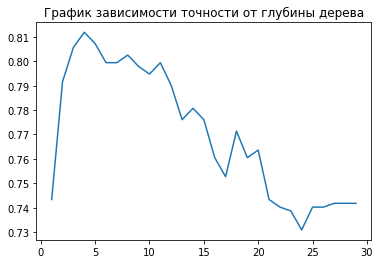

In [37]:
best_model_dtm = None #переменная для лучшей модели
best_result_dtm = 0 # переменная для лучшего результата
best_depth_dtm = 0 # переменная для лучшей глубины дерева
mas = []
for depth1 in range(1,30):
    dtm = DecisionTreeClassifier(max_depth=depth1,random_state = 12345)
    dtm.fit(X_train,y_train)
    DecisionTreeModelPredictionsValid = dtm.predict(X_valid)
    result1 = accuracy_score(y_valid,DecisionTreeModelPredictionsValid)
    mas.append(result1)
    if result1 == max(mas):
        best_model_dtm = dtm
        best_result_dtm = result1
        best_depth_dtm = depth1
print('Лучшая точность полученная на дереве решений: ',best_result_dtm)
print('Лучшая глубина дерева: ',best_depth_dtm)
plt.title('График зависимости точности от глубины дерева')
sns.lineplot(x = range(1,30),y = mas)

Как мы видим точность на валидационной выборке достаточно неплохая, по крайней мере больше чем нам необходима, однако не стоит увлекаться, гонка за точностью, особенно в решающий деревьях может привести к переобучению и дерево начнёт отлично предсказывать нужные нам данные, а вот на новых данных может споткнуться.

### Random Forest

Далее попробуем случайный лес.

In [39]:
best_model_rfc = None #переменная для лучшей модели
best_result_rfc = 0 # переменная для лучшего результата
best_est_rfc = 0 # переменая для записи лучшего количества решающих деревьев
best_depth_rfc = 0 # переменная для лучшей глубины случайного леса 
mas=[]
for est in range(1,15):
    for depth in range(1,15):
        rfc = RandomForestClassifier(max_depth = depth,random_state=42,n_estimators=est)
        rfc.fit(X_train,y_train)
        RandomForestClassifierPredictionsValid = rfc.predict(X_valid)
        result2 = accuracy_score(y_valid,RandomForestClassifierPredictionsValid)
        mas.append(result2)
        if result2 == max(mas):
            best_model_rfc = rfc
            best_result_rfc = result2
            best_est_rfc = est
            best_depth_rfc = depth

In [40]:
print('Лучшая точность на валидационной выборке: ', best_result_rfc)
print('Лучшее количество деревьев: ',best_est_rfc)
print('Лучшая глубина дерева: ',best_depth_rfc)

Лучшая точность на валидационной выборке:  0.8304821150855366
Лучшее количество деревьев:  12
Лучшая глубина дерева:  6


### Logistic Regression

Отлично! Как мы видим, точность выше чем в DecisionTree. Пока что RandomForest это лучшее, что у нас есть. Теперь проверим логистическую регрессию 

In [41]:
lgr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) 
lgr.fit(X_train,y_train)
LogisticRegressionPredictionsValid = lgr.predict(X_valid)
result3 = accuracy_score(y_valid,LogisticRegressionPredictionsValid)
print(result3)

0.7682737169517885


Ну нет, логистическая регрессия нам не подходит. Точность при использовании логистической регрессии совсем низкая, по сравнению с решающим деревом и случайным лесом. Посмотрим что будет на тестовой выборке.

Судя по получившимся точностям лучше всех в данном случае работает случайный лес, немного хуже решающее дерево, и совсем не очень логистическая регрессия

## Проверка лучшей модели на тестовой выборке

In [42]:
RandomForestClassifierPredictionsTest = best_model_rfc.predict(X_test)
resultRandFor = accuracy_score(y_test,RandomForestClassifierPredictionsTest)
print('Точность предсказанных данных на RandomForest: ',resultRandFor)

Точность предсказанных данных на RandomForest:  0.7962674961119751


Как и предполагалось, RandomForest оказалась самой лучшей моделью,однако совершенно непонятно переобучилась данная модель или нет. Для проверки используем кросс-валидацию.

##  Проверка моделей на адекватность

Создадим ещё один RandomForest классификатор и теперь проверим качество модели на кросс-валидации. Перебирая параметры и разделив тренировочную выборку ещё на 5 подвыборок программа закидывает в дерево решений сначала последние 4 куска тренировочного датасета, а 1 кусок скрывает и предсказывает значения на нём. Далее закидывает все куски кроме второго, и предсказывает второй и так далее. Это и называется кросс-валидация. Это поможет оценить адекватность модели и подобранных нами гиперпараметров.

In [43]:
ranfor = RandomForestClassifier()

Записываем в словарь все параметры которые хотим опробовать и все их возможные варианты. Функция GridSearchCV поможет нам их перебрать и выбрать лучший

In [44]:
params = {'criterion':['gini','entropy'],'max_depth': range(1,15), 'n_estimators': range(1,15)}

Записываем в переменную модель которую необходимо обучить, словарь с параметрами и количество подгрупп на которые нужно разделить тренировочную выборку.

In [45]:
grid_search_cv_clf = GridSearchCV(ranfor,params,cv = 5)

Обучаем модель

In [46]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'n_estimators': range(1, 15)})

In [47]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 12}

Вот, это лучшая комбинация гиперпараметров в тех пределах которые мы указали для RandomForestClassifier

Записываем в переменную лучшую модель

In [48]:
best_est = grid_search_cv_clf.best_estimator_

Вычисляем точность лучшей модели

In [49]:
best_est.score(X_test,y_test)

0.7931570762052877

In [50]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
print('Точность наивного алгоритма: ', accuracy_score(y_test, dummy_pred))

Точность наивного алгоритма:  0.6936236391912908


Точность самой простой модели ниже чем точность которой добились мы,поэтому можно сказать,что наш алгоритм адекватен.

Как мы видим, точность близка к нашей, значит наша первоначальная модель вполне адекватна, хотя и могла бы быть получше:) 

Модель можно обучать и далее, однако существует очень большой риск переобучиться и это требует серьёзных вычислительных мощностей, наша точность нас пока устраивает.